# Physics 192.1 Experiment 4 Set A

## Data Analysis

We determine the groove spacing of given CDs and DVDs using the grating equation [[1](https://en.wikipedia.org/wiki/Diffraction_grating#Theory_of_operation)]

$$
    d \sin \theta = n \lambda
$$

where 
- $d$ is the spacing between the slits
- $\theta$ is the $n$-th order diffraction angle
- $n$ is the order of diffraction $n = 1,2,3 ...$
- $\lambda$ is the wavelength of light



In [1]:
# ----------------------------------- #
#              IMPORTS
# ----------------------------------- #

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# for aesthetic plots
def science_plot(fontsize=9, scistyle=True, show_latex=True):
    # Default settings (applied to both 2D and 3D)
    if scistyle:
        import scienceplots
        plt.style.use(['science','grid','notebook'])
    if show_latex:
        plt.rcParams.update({
            # Latex Use
            'text.usetex'     : True,        # Use LaTeX for text rendering
            'font.family'     : 'serif',     # Set font family to serif
        })

    plt.rcParams.update({
        # Fontsizes
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title

        # Legend
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
    })

    def optional():
        # # Grid settings
        # "grid.linestyle": "--",
        # "grid.color": "gray",
        # "grid.linewidth": 1,
        # "axes.grid": True,

        # # Minor grid (default, but may be overridden for 3D)
        # "xtick.minor.visible": True,
        # "ytick.minor.visible": True,

        # # Tick settings (both major & minor)
        # "xtick.direction": "in",
        # "ytick.direction": "in",
        # "xtick.top": True,
        # "xtick.bottom": True,
        # "ytick.left": True,
        # "ytick.right": True,

        # 'colorbar.ticks.direction': 'out',

        # # Major ticks
        # "xtick.major.width": 1,
        # "ytick.major.width": 1,
        # "xtick.major.size": 5,
        # "ytick.major.size": 5,

        # # Minor ticks
        # "xtick.minor.width": 1,
        # "ytick.minor.width": 1,
        # "xtick.minor.size": 2.5,
        # "ytick.minor.size": 2.5,

        # # Spine (border) width
        # "axes.linewidth": 1
        pass 

science_plot(fontsize=9)

Here we have the raw data, with `distance` being the distance of the disc from the wall, `L1` and `R1` showing the distance of the left and right fringes from the central beam, and the number being the order of the fringe (`R2`). All units are in $\text{cm}$, with an uncertainty of $\pm 0.1 \text{ cm}$

In [2]:
df = pd.read_csv("data.csv")
print(df)

  type  distance    R1    R2    L1    L2
0  DVD      55.1  90.8   NaN  90.8   NaN
1  DVD      27.5  45.4   NaN  45.2   NaN
2  DVD      29.0  47.8   NaN  47.5   NaN
3  DVD      19.2  31.9   NaN  31.4   NaN
4  DVD      11.1  18.2   NaN  18.1   NaN
5   CD      69.3  29.2  84.9  29.8  89.4
6   CD      38.1  16.4  48.4  16.1  47.5
7   CD      38.0  16.2  48.5  16.2  46.7
8   CD      40.3  17.2  50.0  17.2  50.7
9   CD      18.5   7.9  23.1   7.9  23.0


We get the diffraction angle $\theta$ using the arctangent function

$$
    \theta = \tan^{-1} \left( \frac{\delta}{\ell} \right)
$$

Where $\delta$ is the distance of the difractor from the wall and $\ell$ being the distance of the fringe from the central beam

In [3]:
# Angles in radians 
df['thetaR1'] = np.arctan(df['R1'] / df['distance'])
df['thetaR2'] = np.arctan(df['R2'] / df['distance'])
df['thetaL1'] = np.arctan(df['L1'] / df['distance'])
df['thetaL2'] = np.arctan(df['L2'] / df['distance'])
# Angles in degrees
thetaR1deg = np.rad2deg(df['thetaR1'])
thetaR2deg = np.rad2deg(df['thetaR2'])
thetaL1deg = np.rad2deg(df['thetaL1'])
thetaL2deg = np.rad2deg(df['thetaL2'])

deg_df = pd.DataFrame({
    'thetaR1 deg': thetaR1deg,
    'thetaR2 deg': thetaR2deg,
    'thetaL1 deg': thetaL1deg,
    'thetaL2 deg': thetaL2deg
})
print(deg_df)

   thetaR1 deg  thetaR2 deg  thetaL1 deg  thetaL2 deg
0    58.749443          NaN    58.749443          NaN
1    58.795584          NaN    58.683373          NaN
2    58.755039          NaN    58.594836          NaN
3    58.957069          NaN    58.555675          NaN
4    58.621398          NaN    58.480890          NaN
5    22.848437    50.776805    23.268403    52.218310
6    23.289277    51.790530    22.907567    51.266717
7    23.089317    51.921118    23.089317    50.864596
8    23.112741    51.131186    23.112741    51.519802
9    23.123792    51.309957    23.123792    51.188616


The equipment used was a $\text{He-Ne}$ laser, which has a known light wavelength of $\lambda = 632.8 \text{ nm}$

Using that, we can solve for the grating spacing using 
$$
    d = \frac{n\lambda}{\sin\theta}
$$

We group the fringes by order, then take the average of each row.

In [4]:
# Wavelength in cm
lambda_cm = 632.8e-9 / 1e-2  # 632.8 nm = 6.328e-7 cm

## All units are in cm measure
# Grating spacing d = m* lambda / sin theta
order_map = {'thetaR1':1, 'thetaL1':1, 'thetaR2':2, 'thetaL2':2}
for ang_col, n in order_map.items():
    dcol = f'd_{ang_col}'
    df[dcol] = n * lambda_cm / np.sin(df[ang_col])

# Row averages
d_cols = [c for c in df.columns if c.startswith('d_')]
df['d_row_mean'] = df[d_cols].mean(axis=1, skipna=True)

pd.set_option('display.float_format', '{:.8f}'.format)
print(df[d_cols])

   d_thetaR1  d_thetaL1  d_thetaR2  d_thetaL2
0 0.00007402 0.00007402        NaN        NaN
1 0.00007398 0.00007407        NaN        NaN
2 0.00007402 0.00007414        NaN        NaN
3 0.00007386 0.00007417        NaN        NaN
4 0.00007412 0.00007423        NaN        NaN
5 0.00016297 0.00016019 0.00016337 0.00016013
6 0.00016005 0.00016257 0.00016107 0.00016224
7 0.00016136 0.00016136 0.00016078 0.00016316
8 0.00016121 0.00016121 0.00016255 0.00016167
9 0.00016113 0.00016113 0.00016214 0.00016242


We take the average of the result by type

In [5]:
print(df[['type'] + d_cols + ['d_row_mean']])
# Summary per type
summary = (df.groupby('type')['d_row_mean']
             .agg(['mean','std','count'])
             .rename(columns={'mean':'d_mean_cm','std':'d_std_cm'}))
print(" ")
print(summary)

  type  d_thetaR1  d_thetaL1  d_thetaR2  d_thetaL2  d_row_mean
0  DVD 0.00007402 0.00007402        NaN        NaN  0.00007402
1  DVD 0.00007398 0.00007407        NaN        NaN  0.00007403
2  DVD 0.00007402 0.00007414        NaN        NaN  0.00007408
3  DVD 0.00007386 0.00007417        NaN        NaN  0.00007402
4  DVD 0.00007412 0.00007423        NaN        NaN  0.00007418
5   CD 0.00016297 0.00016019 0.00016337 0.00016013  0.00016166
6   CD 0.00016005 0.00016257 0.00016107 0.00016224  0.00016148
7   CD 0.00016136 0.00016136 0.00016078 0.00016316  0.00016167
8   CD 0.00016121 0.00016121 0.00016255 0.00016167  0.00016166
9   CD 0.00016113 0.00016113 0.00016214 0.00016242  0.00016171
 
      d_mean_cm   d_std_cm  count
type                             
CD   0.00016164 0.00000009      5
DVD  0.00007406 0.00000007      5


We transform the data to $\text{nm}$, and take the $\text{SDOM}$ for the uncertainty.

We also calculate the grooves per $\text{mm}$ of the result (taken using $0.1 / d$)

In [6]:
# Reset pandas display to default
pd.reset_option('display.float_format')

# --- Groove spacing in nm ---
summary['d_mean_nm'] = summary['d_mean_cm'] * 1e7 # cm --> nm
summary['d_std_nm'] = summary['d_std_cm'] * 1e7

# sdom for d (in nm)
summary['d_sdom_nm'] = summary['d_std_nm'] / np.sqrt(summary['count'])

# --- Grooves per mm ---
summary['grooves_per_mm'] = 0.1 / summary['d_mean_cm']

# print data
print(summary[['d_mean_nm','d_sdom_nm','d_std_nm','grooves_per_mm']])

        d_mean_nm  d_sdom_nm  d_std_nm  grooves_per_mm
type                                                  
CD    1616.359594   0.391907  0.876330      618.674213
DVD    740.634027   0.303630  0.678938     1350.194514


As such, we have final results of 
$$
d_\text{CD} = 1616.4 \pm 0.4 \text{ nm}
$$

and 

$$
d_\text{DVD} = 740.6 \pm 0.3 \text{ nm}
$$

The standard DVD and CD grooves per mm [[2](https://nnci.net/sites/default/files/2020-02/CD_DVD_Diffraction%20grating_Part%201_SG_answers_0.pdf)]
 is about 1350 tracks per mm for a DVD and about 625 tracks per mm for a CD, this translates to


In [7]:
g_dvd = 1350
g_cd = 625 
d_dvd = 1/g_dvd * 1e6 # transform from mm to nm
d_cd = 1/g_cd * 1e6

summary['d_actual_nm'] = [d_cd,d_dvd]
print(f'd_CD  = {  d_cd:.2f} nm')
print(f'd_DVD =  {d_dvd:.2f} nm')

d_CD  = 1600.00 nm
d_DVD =  740.74 nm


Which indicatest that the calculated result has a percent error $\epsilon$ of 

In [8]:
summary['eps'] = 100 * np.abs((summary['d_actual_nm'] - summary['d_mean_nm']) / summary['d_actual_nm'])
summary['eps'] = summary['eps'].apply(lambda x: f"{x:.2f}%")
print(summary[['d_actual_nm', 'd_mean_nm', 'eps']])

      d_actual_nm    d_mean_nm    eps
type                                 
CD    1600.000000  1616.359594  1.02%
DVD    740.740741   740.634027  0.01%


Thus, we were able to determine the grating distance in both DVD and CD with very little error using the grating equation

## Diagrams

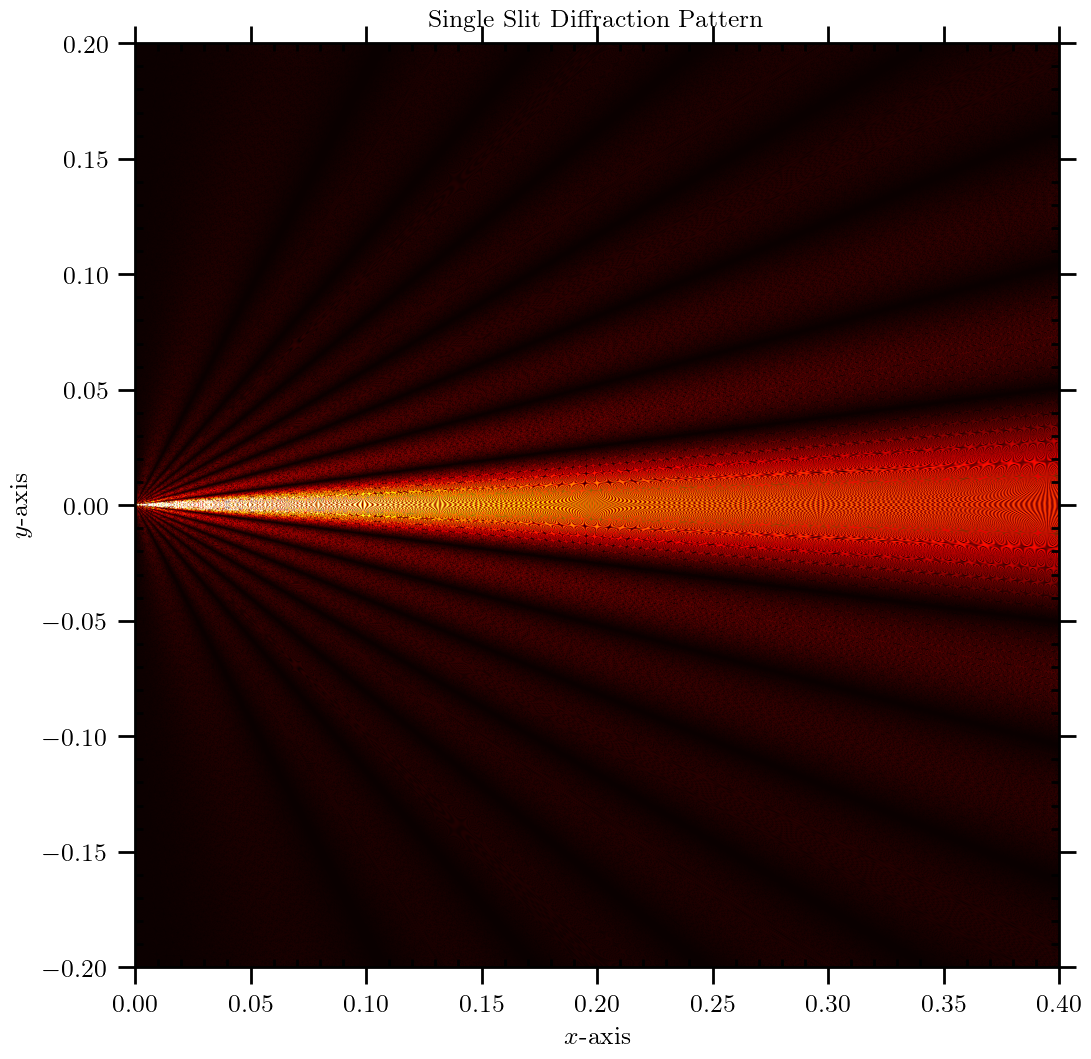

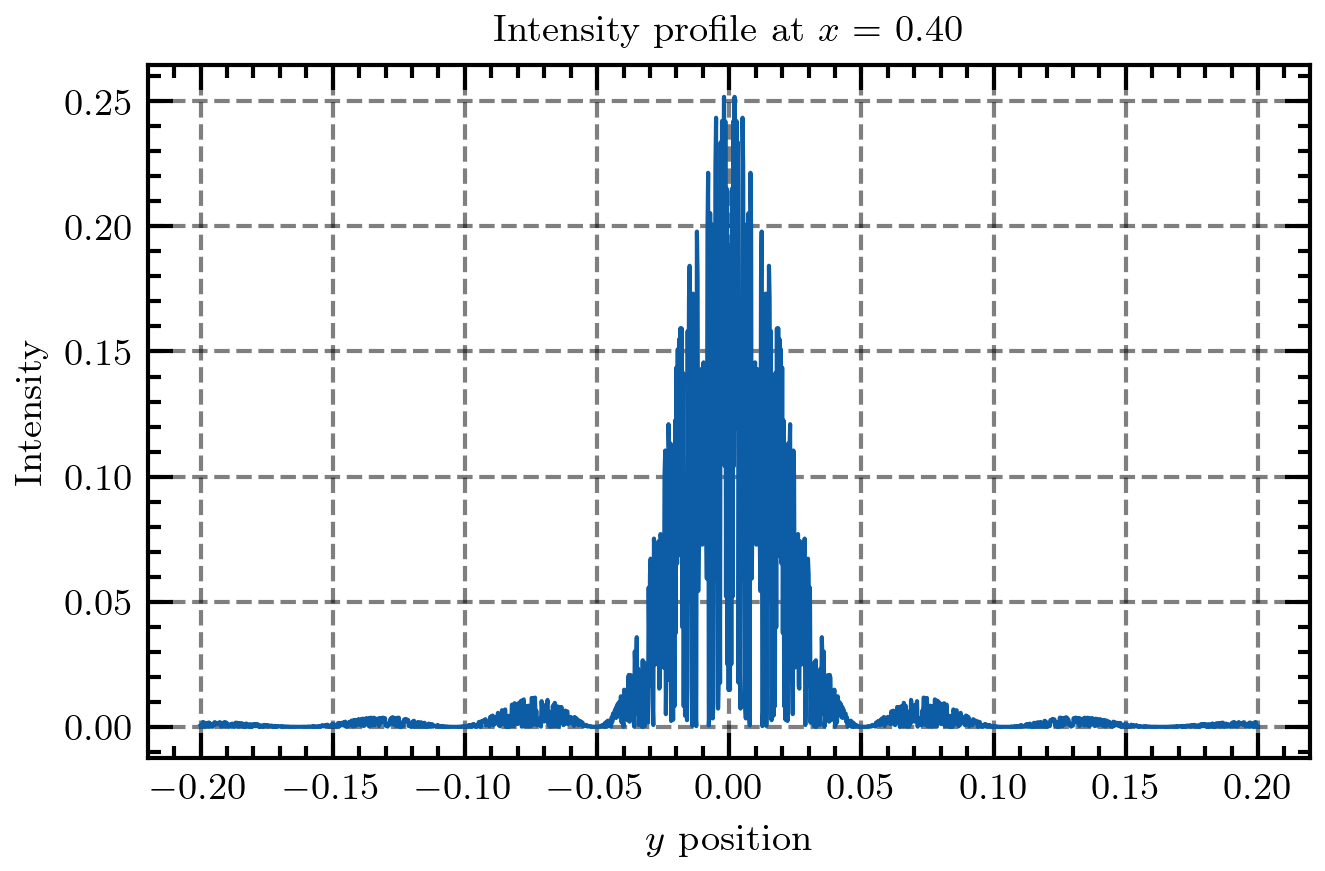

In [9]:
import numpy as np
import matplotlib.pyplot as plt

lambda_val = 633e-9
xlim = (0, 0.4)
ylim = (-0.2, 0.2)
dx = 0.00025
dy = 0.00025
x = np.arange(*xlim, dx)
y = np.arange(*ylim, dy)

eps = 1e-12
xv, yv = np.meshgrid(x, y)

# Create 100 point sources for a single slit
num_sources = 200
slit_width = 5e-6  # Width of the slit
source_positions = np.linspace(-slit_width/2, slit_width/2, num_sources)


# Initialize total wave field
S_total = np.zeros_like(xv, dtype=np.float64)

for i, y_source in enumerate(source_positions):
    r = np.sqrt((xv - 0)**2 + (yv - y_source)**2)
    phase = 2 * np.pi * r / lambda_val 
    S_total += np.cos(phase) / np.sqrt(r + eps)
# Calculate intensity (square of amplitude)

S = S_total**2
# smax = 20000
# S[S > smax] = smax
# S /= np.max(S)

# Use percentile-based clipping instead of fixed threshold
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)

# Normalize properly
S = S / np.max(S)

# Square root scaling for visualization
S_scaled = np.sqrt(S)

plt.figure(figsize=(6, 6), dpi=200)
plt.imshow(S_scaled, extent=[*xlim, *ylim], cmap='hot', origin='lower')
plt.grid(False)
plt.xlabel('$x$-axis')
plt.ylabel('$y$-axis')
plt.tick_params(axis='both', direction='out')
plt.title('Single Slit Diffraction Pattern')
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
intensity_profile = S[:, -1]
plt.plot(y, intensity_profile, linewidth=1)
plt.xlabel('$y$ position')
plt.ylabel('Intensity')
plt.title('Intensity profile at $x$ = {:.2f}'.format(x[-1]))
plt.show()

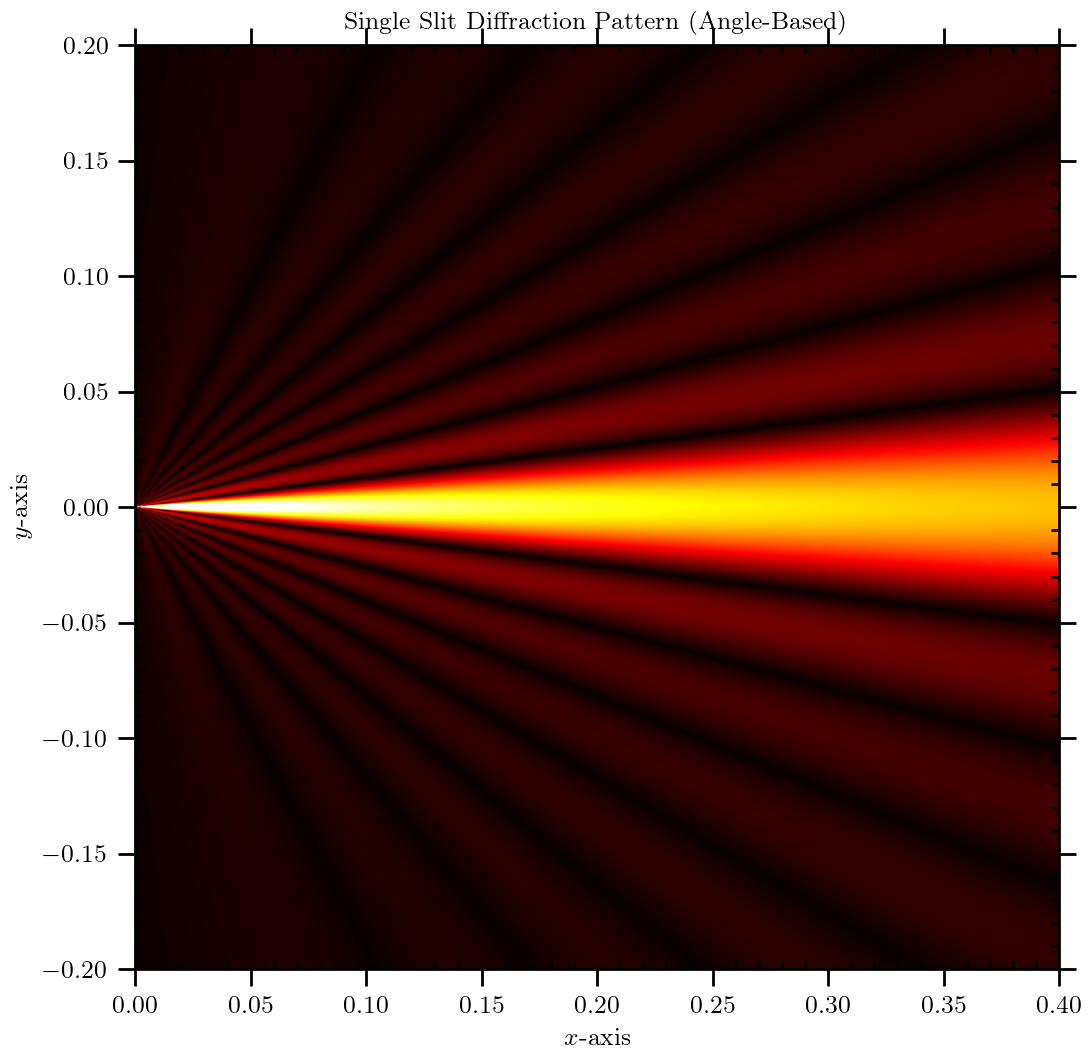

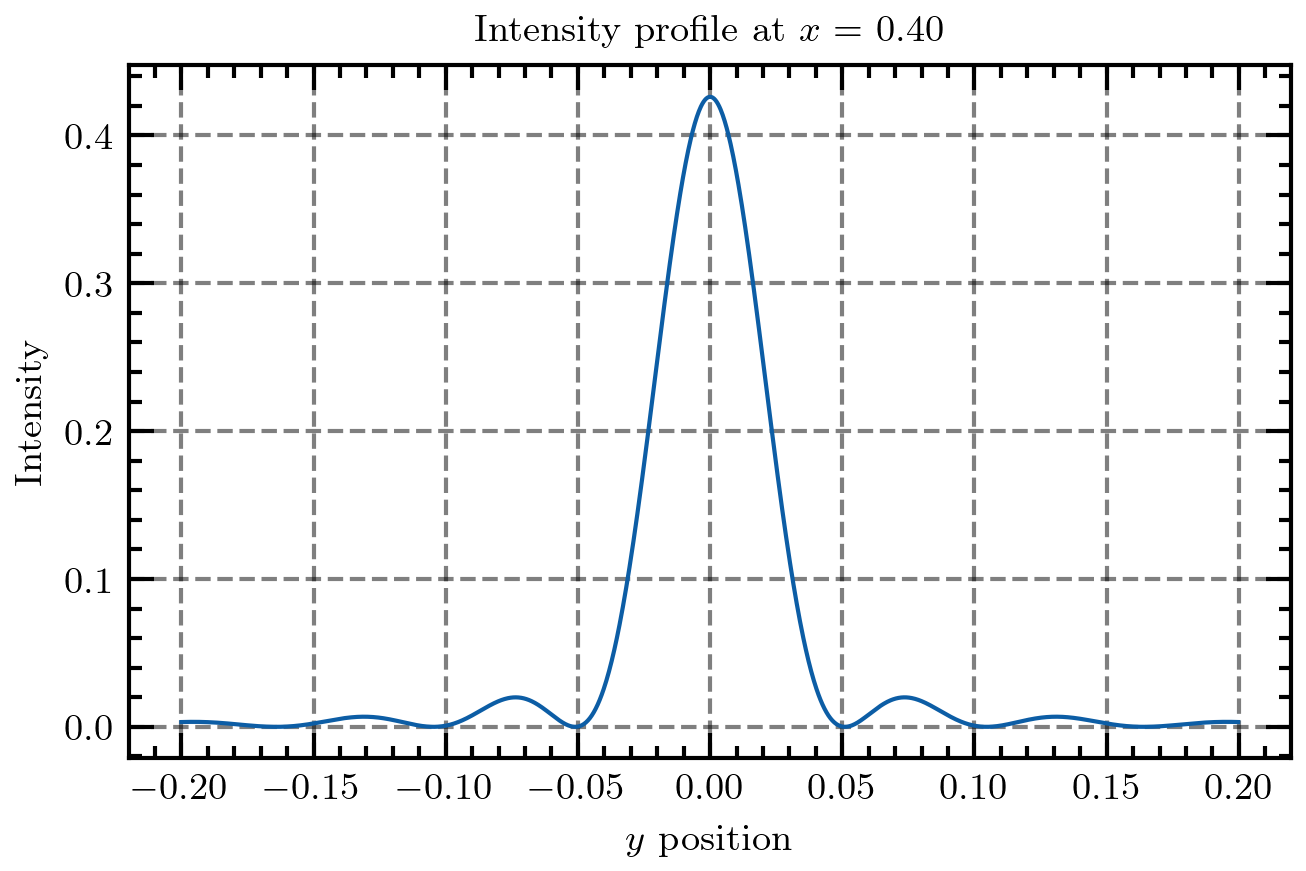

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_val = 633e-9  # Wavelength
k = 2 * np.pi / lambda_val  # Wave number
xlim = (0, 0.4)
ylim = (-0.2, 0.2)
dx = 0.00025
dy = 0.00025
x = np.arange(*xlim, dx)
y = np.arange(*ylim, dy)

# Slit parameters
slit_width = 5e-6  # Width of the slit

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Calculate distance from source and angle theta
r = np.sqrt(xv**2 + yv**2)
theta = np.arctan2(yv, xv)   # Angle from the slit
eps = 1e-12
# Single slit diffraction pattern (Fraunhofer approximation)
# The correct formula is: I ∝ sinc²(π * a * sin(θ) / λ)
# where a is slit width, θ is the angle from the slit


def sinc(x):
    """Calculate sinc(x) = sin(x)/x, with sinc(0) = 1"""
    # Handle the case where x is 0 (or very close to 0)
    result = np.ones_like(x)
    # For non-zero values, calculate sin(x)/x
    mask = np.abs(x) > 1e-12  # Avoid division by very small numbers
    result[mask] = np.sin(x[mask]) / x[mask]
    return result

# Calculate the diffraction pattern based on angle
argument = np.pi * slit_width * np.sin(theta) / lambda_val
diffraction_pattern = sinc(argument)**2  # sinc² function

# Add the 1/r intensity decay for spherical waves
intensity_decay = 1 / np.sqrt(r)

# Combine to get the full pattern
S = diffraction_pattern * intensity_decay

# Use percentile-based clipping instead of fixed threshold
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)
# Normalize properly
S = S / np.max(S)

# Apply scaling for visualization
S_scaled = np.sqrt(S)

# Plotting
plt.figure(figsize=(6, 6), dpi=200)
plt.imshow(S_scaled, extent=[*xlim, *ylim], cmap='hot', origin='lower')
plt.grid(False)
plt.xlabel('$x$-axis')
plt.ylabel('$y$-axis')
plt.tick_params(axis='both', direction='out')
plt.title('Single Slit Diffraction Pattern (Angle-Based)')
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
intensity_profile = S[:, -1]
plt.plot(y, intensity_profile, linewidth=1)
plt.xlabel('$y$ position')
plt.ylabel('Intensity')
plt.title('Intensity profile at $x$ = {:.2f}'.format(x[-1]))
plt.show()

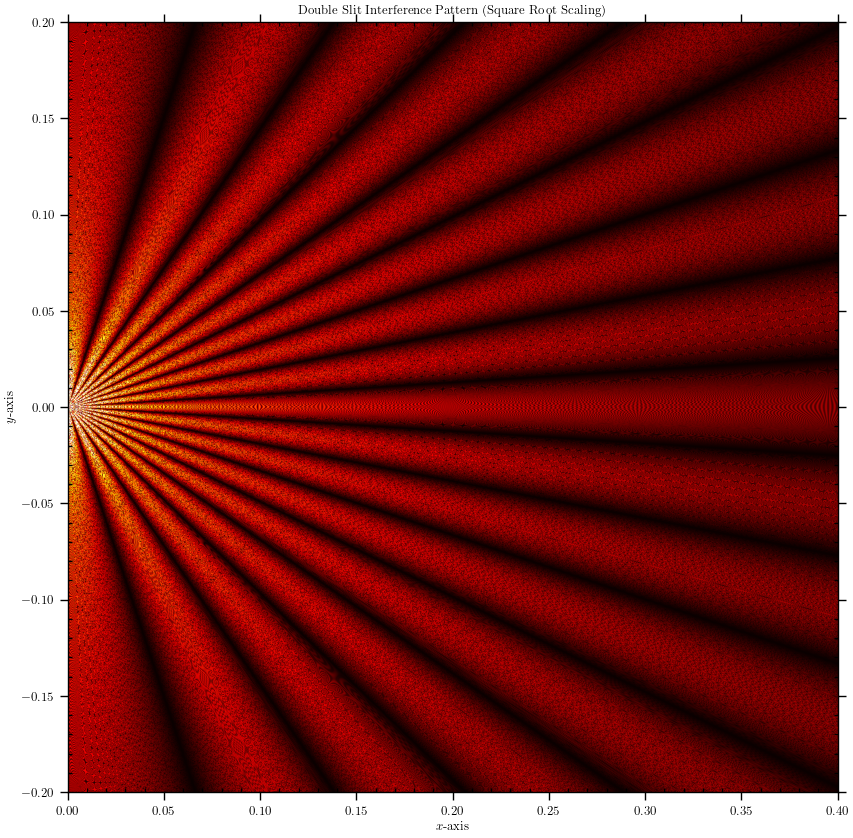

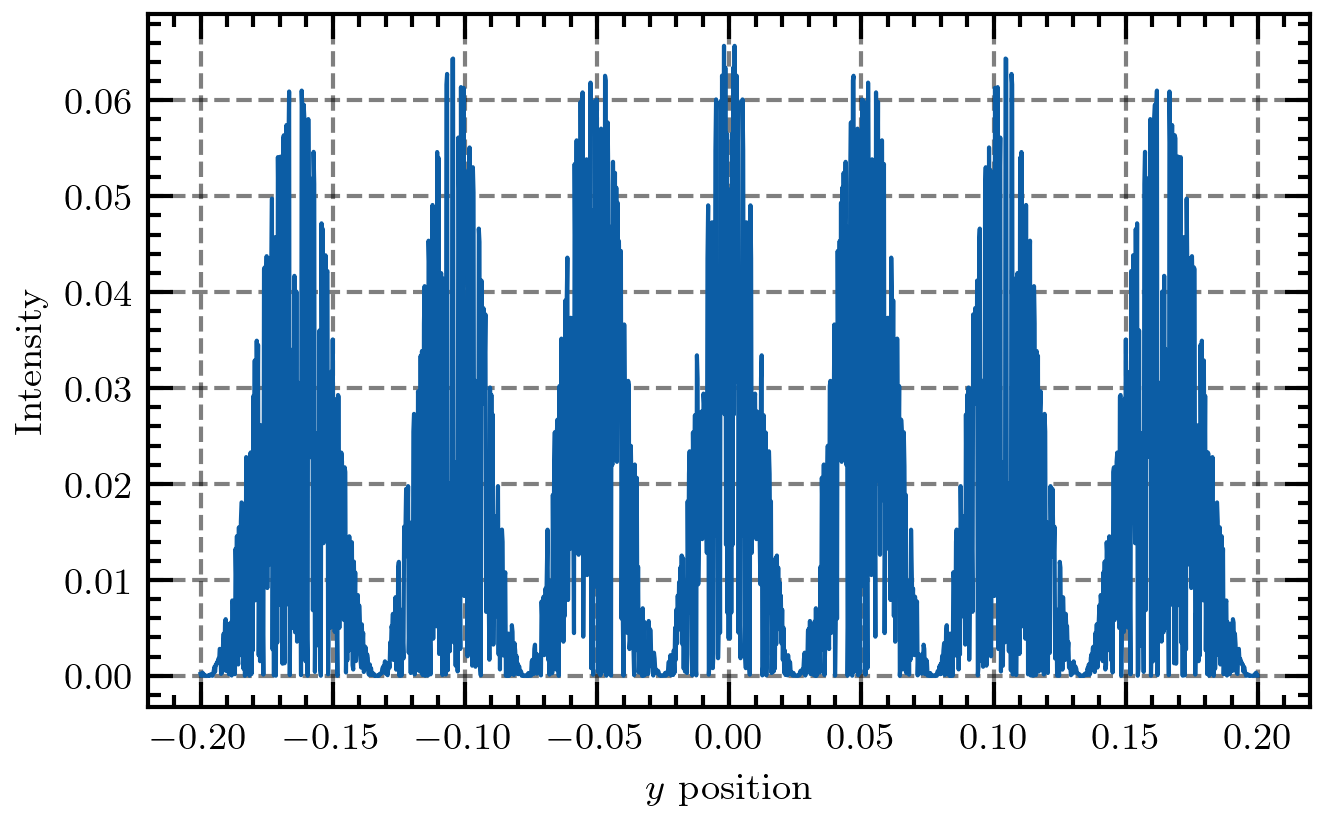

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

lambda_val = 633e-9
xlim = (0, 0.4)
ylim = (-0.2, 0.2)
dx = 0.00025
dy = 0.00025
x = np.arange(*xlim, dx)
y = np.arange(*ylim, dy)

eps = 1e-12
d = 5e-6
xv, yv = np.meshgrid(x, y)
c1 = [0, -d/2]
r1 = np.sqrt((xv - c1[0])**2 + (yv - c1[1])**2)
S1 = np.cos(2 * np.pi * r1 / lambda_val) / np.sqrt(r1+eps) #np.sqrt(r1+eps)  # Added small offset

c2 = [0, d/2]
r2 = np.sqrt((xv - c2[0])**2 + (yv - c2[1])**2)
S2 = np.cos(2 * np.pi * r2 / lambda_val) / np.sqrt(r2+eps) #np.sqrt(r2+eps)  # Added small offset

S = (S1 + S2)**2

# Use percentile-based clipping instead of fixed threshold
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)
# Normalize properly
S = S / np.max(S)
# Option 1: Square root scaling (good for intensity data)
S_scaled = np.sqrt(S)

# Option 2: Power law scaling with gamma correction
# gamma = 0.5  # Adjust between 0.1-0.5 for more contrast
# S_scaled = S**gamma

# Option 3: Log scaling with offset to handle zeros
# S_scaled = np.log(S + 1e-6)  # Add small offset to avoid log(0)

# Option 4: Use matplotlib's built-in LogNorm (handles zeros better)
# plt.imshow(S, extent=[*xlim, *ylim], cmap='inferno', origin='lower', norm=LogNorm(vmin=1e-6, vmax=1))

# Option 5: Use matplotlib's PowerNorm
# plt.imshow(S, extent=[*xlim, *ylim], cmap='inferno', origin='lower', norm=PowerNorm(gamma=0.5))

plt.figure(figsize=(10, 10))
plt.imshow(S_scaled, extent=[*xlim, *ylim], cmap='hot', origin='lower')
plt.grid(False)
plt.xlabel('$x$-axis')
plt.ylabel('$y$-axis')
plt.tick_params(axis='both', direction='out')
# plt.colorbar(label='Scaled Intensity')
plt.title('Double Slit Interference Pattern (Square Root Scaling)')
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
intensity_profile = S[:, -1]
plt.plot(y, intensity_profile, linewidth = 1)
plt.xlabel('$y$ position')
plt.ylabel('Intensity')
# plt.title('Intensity profile at x = {}'.format(x[-1]))
plt.show()



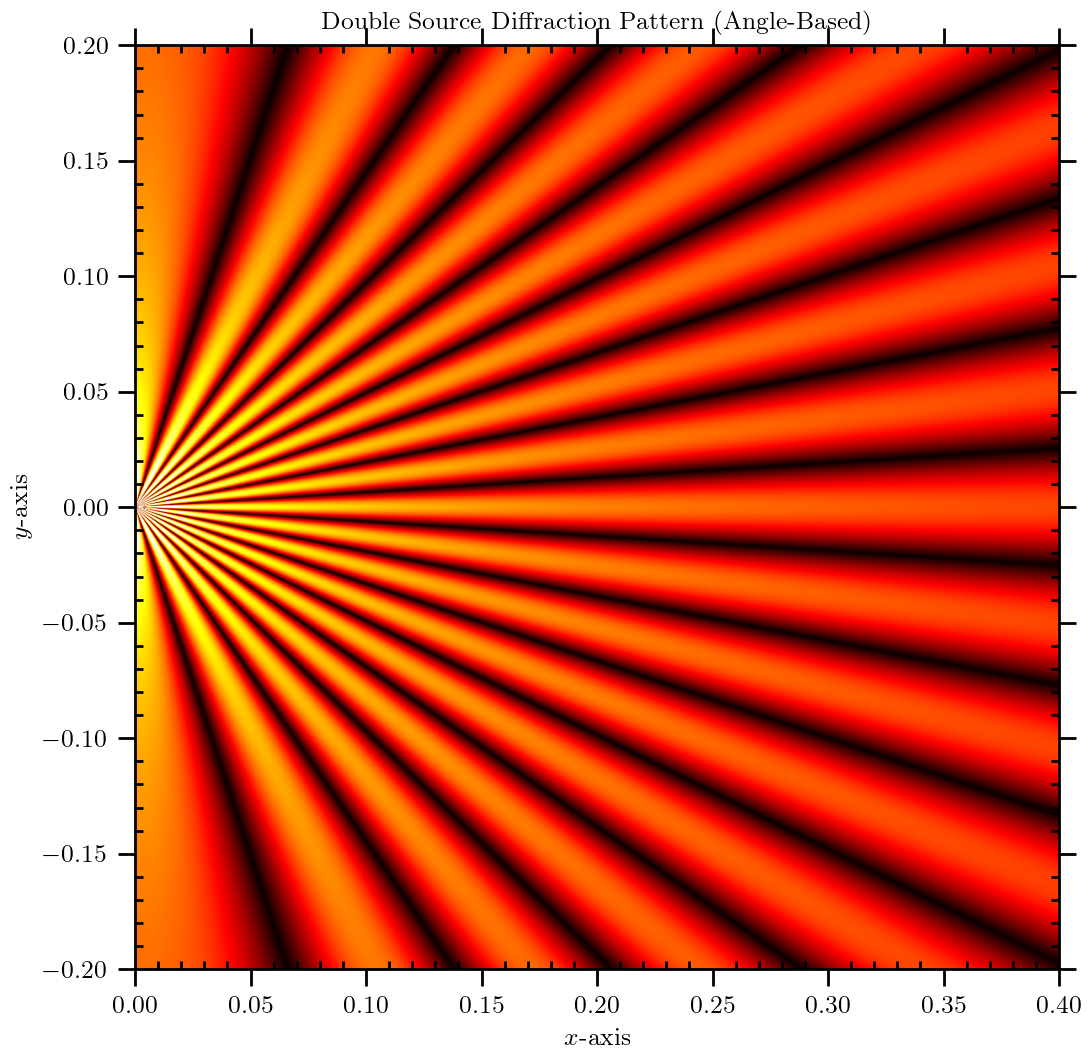

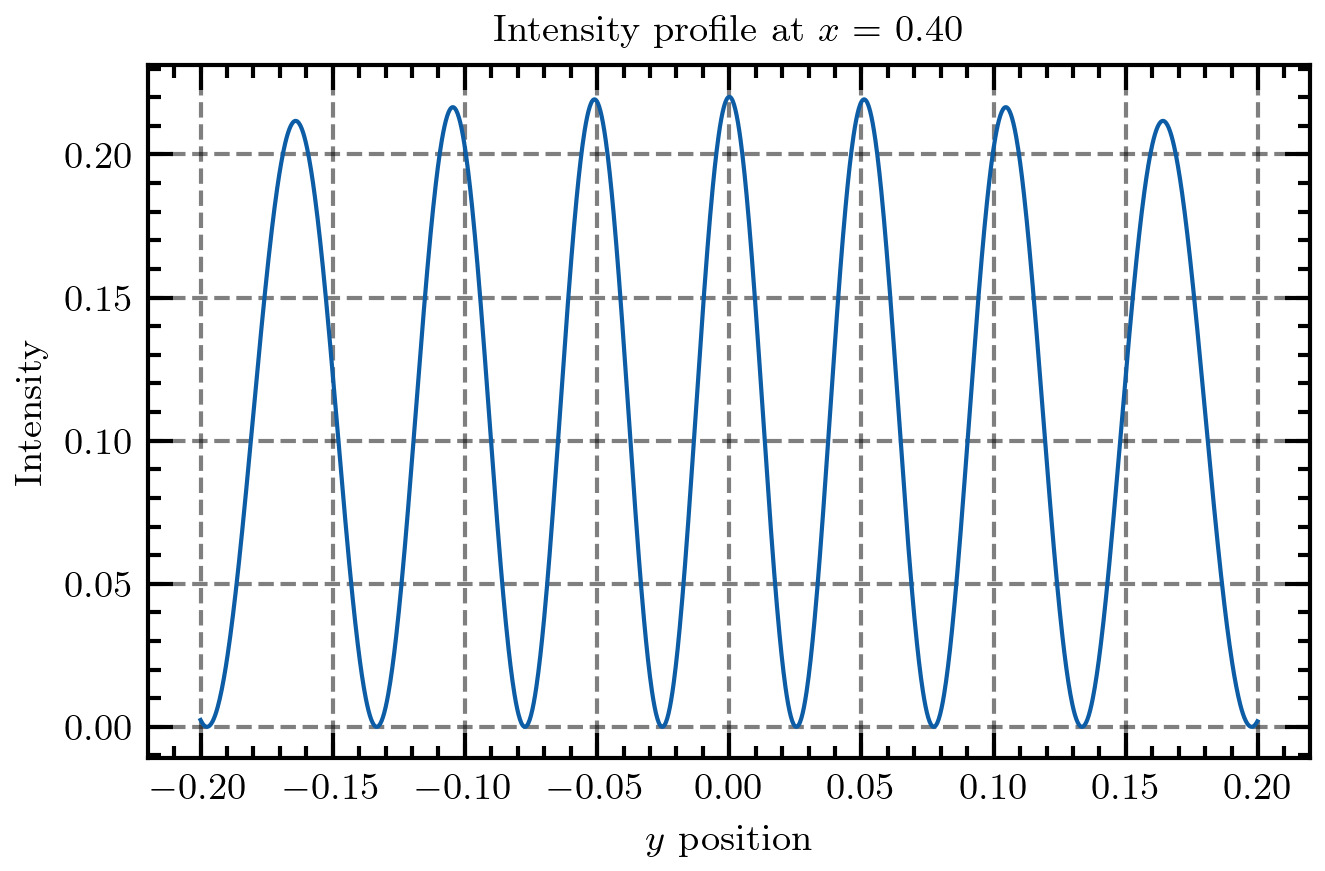

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_val = 633e-9  # Wavelength
k = 2 * np.pi / lambda_val  # Wave number
xlim = (0, 0.4)
ylim = (-0.2, 0.2)
dx = 0.00025
dy = 0.00025
x = np.arange(*xlim, dx)
y = np.arange(*ylim, dy)

# Slit parameters
distance = 5e-6  # Width of the slit

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Calculate distance from source and angle theta
r = np.sqrt(xv**2 + yv**2)
theta = np.arctan2(yv, xv)   # Angle from the slit
eps = 1e-12
# Single slit diffraction pattern (Fraunhofer approximation)
# The correct formula is: I ∝ sinc²(π * a * sin(θ) / λ)
# where a is slit width, θ is the angle from the slit


# Calculate the diffraction pattern based on angle
argument = np.pi * distance * np.sin(theta) / lambda_val
diffraction_pattern = np.cos(argument)**2  # sinc² function

# Add the 1/r intensity decay for spherical waves
intensity_decay = 1 / np.sqrt(r)

# Combine to get the full pattern
S = diffraction_pattern * intensity_decay

# Use percentile-based clipping instead of fixed threshold
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)
# Normalize properly
S = S / np.max(S)

# Apply scaling for visualization
S_scaled = np.sqrt(S)

# Plotting
plt.figure(figsize=(6, 6), dpi=200)
plt.imshow(S_scaled, extent=[*xlim, *ylim], cmap='hot', origin='lower')
plt.grid(False)
plt.xlabel('$x$-axis')
plt.ylabel('$y$-axis')
plt.tick_params(axis='both', direction='out')
plt.title('Double Source Diffraction Pattern (Angle-Based)')
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
intensity_profile = S[:, -1]
plt.plot(y, intensity_profile, linewidth=1)
plt.xlabel('$y$ position')
plt.ylabel('Intensity')
plt.title('Intensity profile at $x$ = {:.2f}'.format(x[-1]))
plt.show()

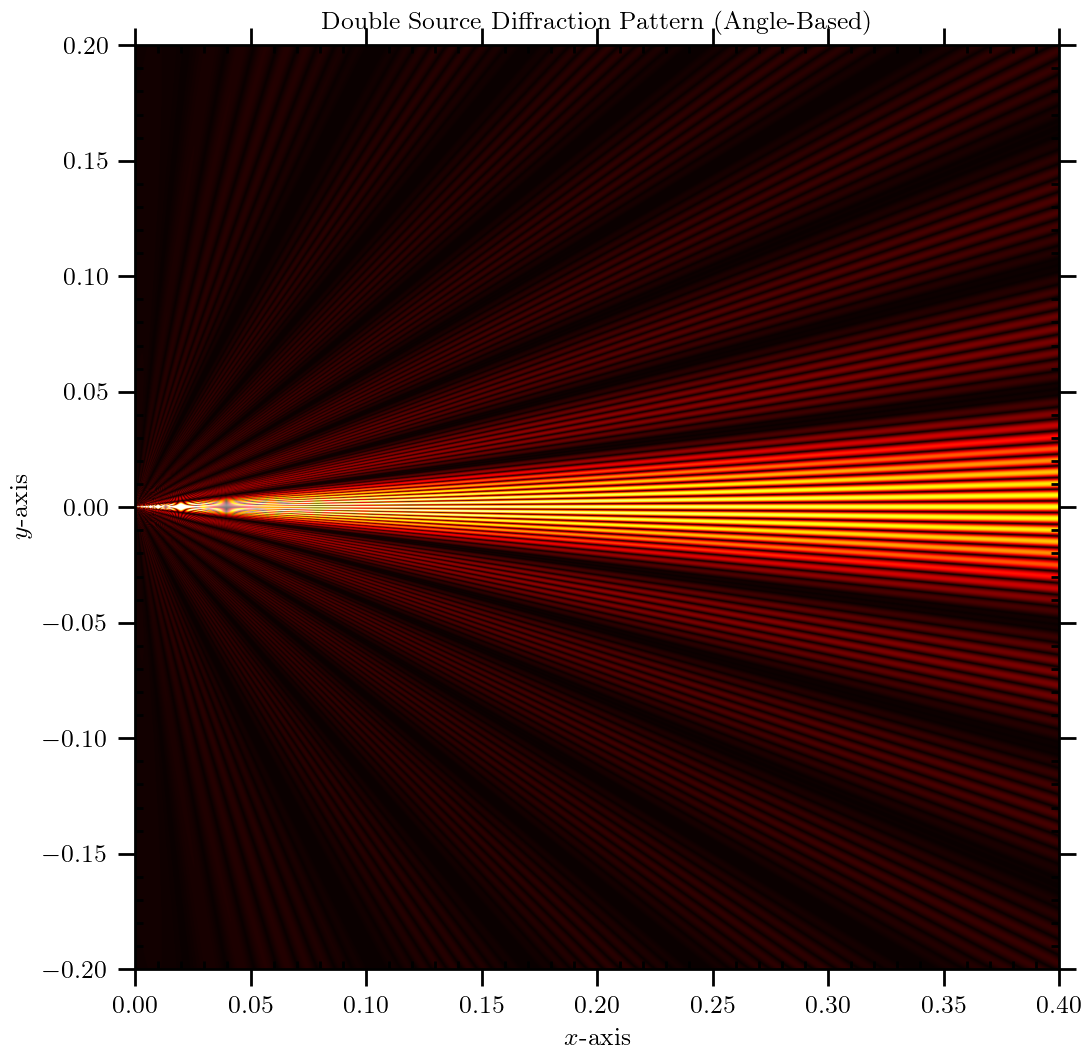

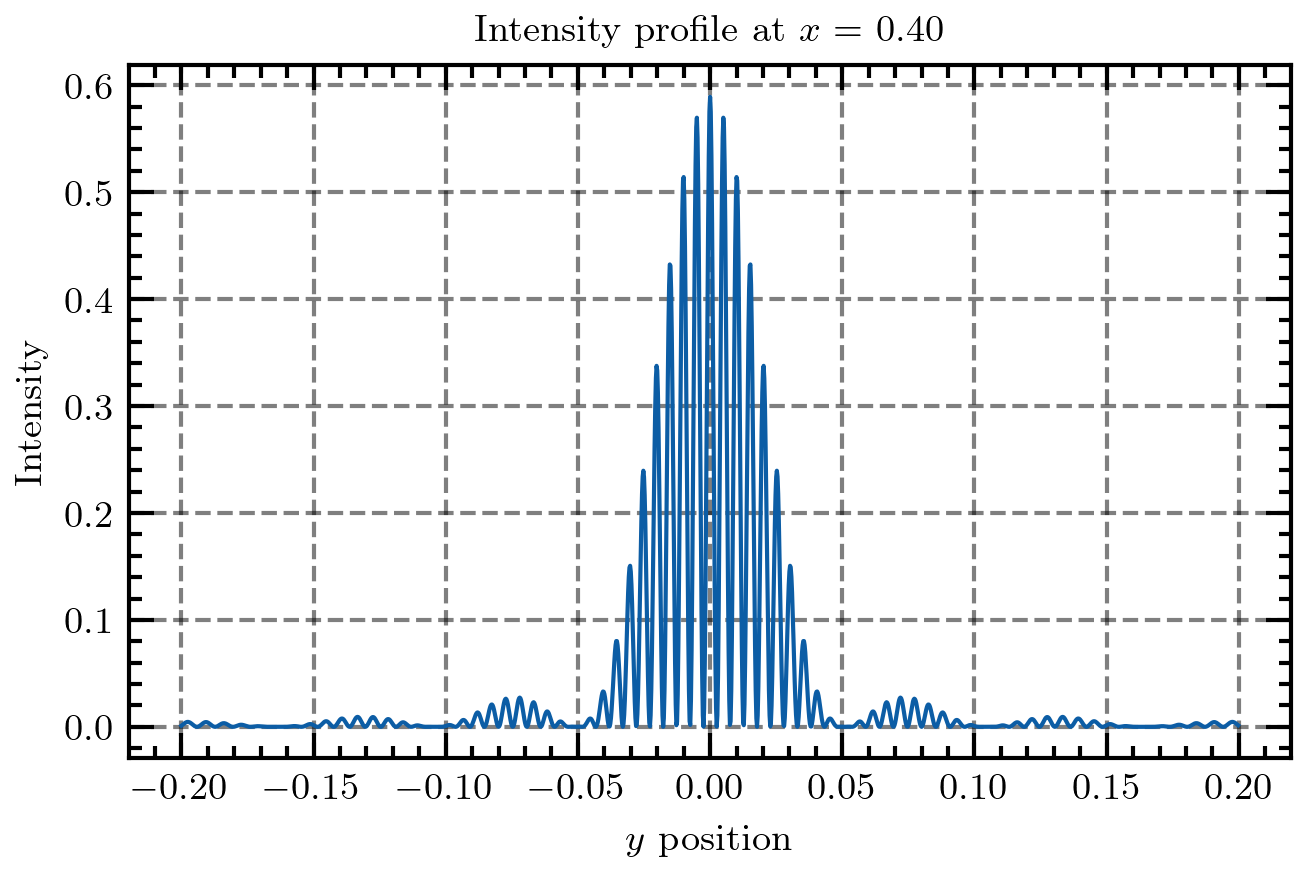

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_val = 633e-9  # Wavelength
k = 2 * np.pi / lambda_val  # Wave number
xlim = (0, 0.4)
ylim = (-0.2, 0.2)
dx = 0.00025
dy = 0.00025
x = np.arange(*xlim, dx)
y = np.arange(*ylim, dy)

# Slit parameters
a = 5e-6  # Width of the slit
d = 5e-5

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Calculate distance from source and angle theta
r = np.sqrt(xv**2 + yv**2)
theta = np.arctan2(yv, xv)   # Angle from the slit
eps = 1e-12
# Single slit diffraction pattern (Fraunhofer approximation)
# The correct formula is: I ∝ sinc²(π * a * sin(θ) / λ)
# where a is slit width, θ is the angle from the slit


def sinc(x):
    """Calculate sinc(x) = sin(x)/x, with sinc(0) = 1"""
    # Handle the case where x is 0 (or very close to 0)
    result = np.ones_like(x)
    # For non-zero values, calculate sin(x)/x
    mask = np.abs(x) > 1e-12  # Avoid division by very small numbers
    result[mask] = np.sin(x[mask]) / x[mask]
    return result

# Calculate the diffraction pattern based on angle
argument_c = np.pi * d * np.sin(theta) / lambda_val
diffraction_pattern_c = np.cos(argument_c)**2  # sinc² function

argument_s = np.pi * a * np.sin(theta) / lambda_val
diffraction_pattern_s = sinc(argument_s)**2  # sinc² function

# Add the 1/r intensity decay for spherical waves
intensity_decay = 1 / np.sqrt(r)

# Combine to get the full pattern
S = diffraction_pattern_c * diffraction_pattern_s * intensity_decay

# Use percentile-based clipping instead of fixed threshold
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)
# Normalize properly
S = S / np.max(S)

# Apply scaling for visualization
S_scaled = np.sqrt(S)

# Plotting
plt.figure(figsize=(6, 6), dpi=200)
plt.imshow(S_scaled, extent=[*xlim, *ylim], cmap='hot', origin='lower')
plt.grid(False)
plt.xlabel('$x$-axis')
plt.ylabel('$y$-axis')
plt.tick_params(axis='both', direction='out')
plt.title('Double Source Diffraction Pattern (Angle-Based)')
plt.show()

plt.figure(figsize=(5, 3), dpi=300)
intensity_profile = S[:, -1]
plt.plot(y, intensity_profile, linewidth=1)
plt.xlabel('$y$ position')
plt.ylabel('Intensity')
plt.title('Intensity profile at $x$ = {:.2f}'.format(x[-1]))
plt.show()

0.0019984


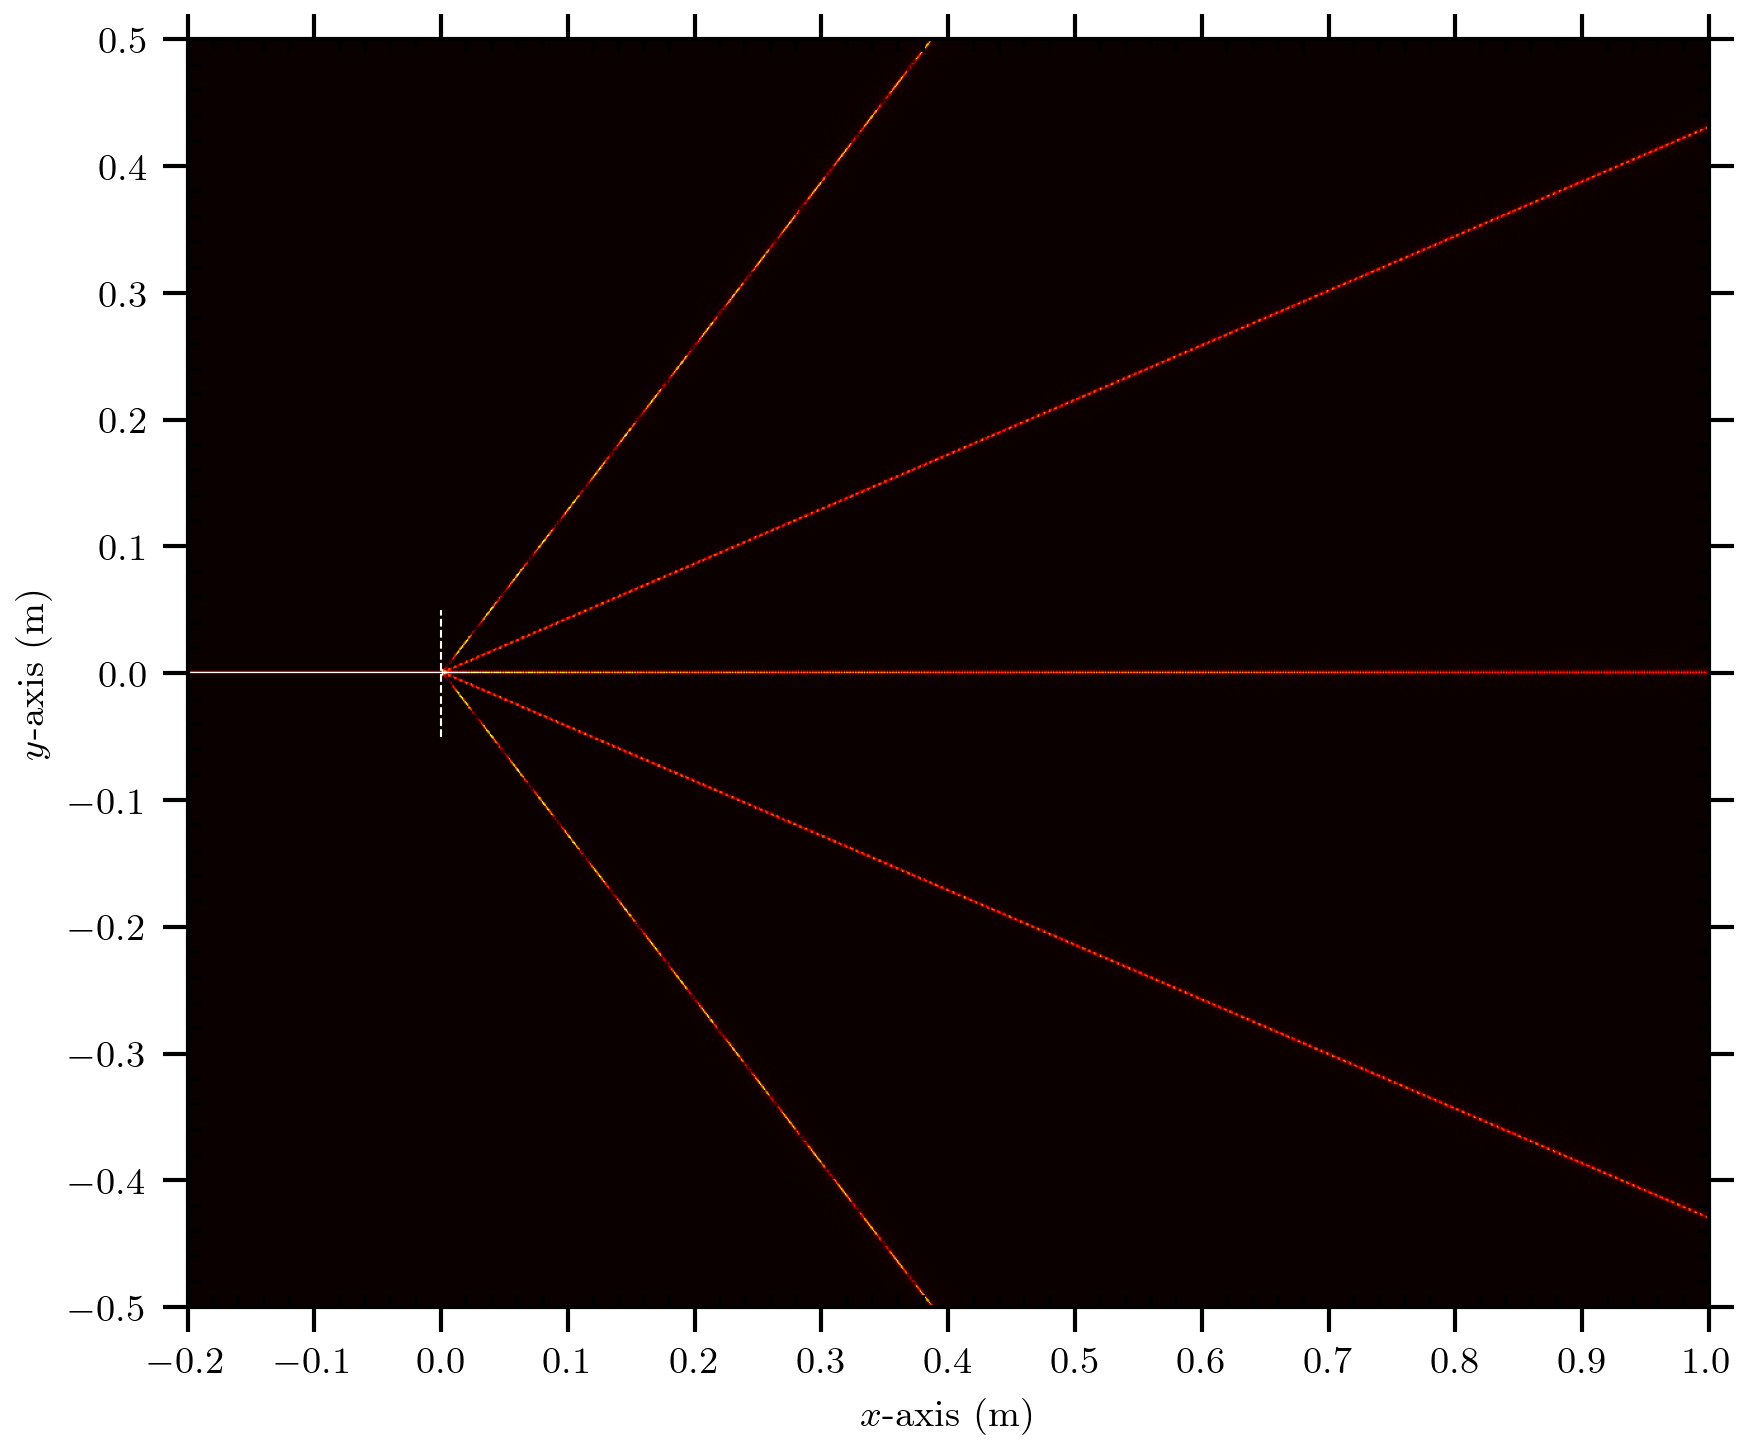

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_val = 633e-9  # Wavelength
xlim = (-0.2, 1)
ylim = (-0.5, 0.5)
dx = 0.001
dy = 0.001
x = np.arange(*xlim, dx)
y = np.arange(*ylim, dy)

# Create source positions
num_sources = 625 * 2 ## around 2 mm beam
spacing = 1600e-9  # 1600 nm in meters
total_width = (num_sources - 1) * spacing
print(total_width)
source_y_positions = np.linspace(-total_width/2, total_width/2, num_sources)
source_positions = [(0, y) for y in source_y_positions]

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Initialize total wave field
S_total = np.zeros_like(xv)

# Add contribution from each source
for source_x, source_y in source_positions:
    r = np.sqrt((xv - source_x)**2 + (yv - source_y)**2)
    # Add wave contribution from this source with amplitude decay
    S_total += np.cos(2 * np.pi * r / lambda_val) / np.sqrt(r)  

# Calculate intensity (square of amplitude)
S = S_total**2
S /= np.max(S)  # Normalize
S = np.sqrt(S)  # scaling 
S[xv<0] = 0

# Gaussian beam profile at y=0
beam = np.exp(-(yv**2) / (2 * (total_width/4)**2))  # Gaussian in y-direction
# Apply 1/sqrt(x) decay only where x > 0
# Create a decay factor array that is 1 where x <= 0 and 1/sqrt(x) where x > 0
decay_factor = np.ones_like(xv)
decay_factor[xv > 0] = 0.1 / np.sqrt(xv[xv > 0])
# # Apply the decay to the entire beam
beam = beam * decay_factor
# # Normalize the beam
#beam /= np.max(beam)

S = S + beam
S[S>1] = 1

# Plot


plt.figure(figsize=(6, 6), dpi =300)
plt.imshow(S, extent=[*xlim,*ylim], cmap='hot', origin='lower')
plt.plot([0,0],[-0.05,0.05], color = 'white', linestyle = '--', linewidth = 0.5)
plt.grid(False)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.xticks(np.arange(-0.2,1.1,0.1))
plt.yticks(np.arange(-0.5,0.6,0.1))
#plt.title(f'Wave Interference from Diffraction grating (Spacing: {spacing*1e9:.0f} nm)')
#plt.colorbar(label='Normalized Intensity')
plt.xlabel('$x$-axis (m)')
plt.ylabel('$y$-axis (m)')
plt.tick_params(axis='both', which='both' direction='out')
plt.tight_layout()
plt.show()

0.0024976


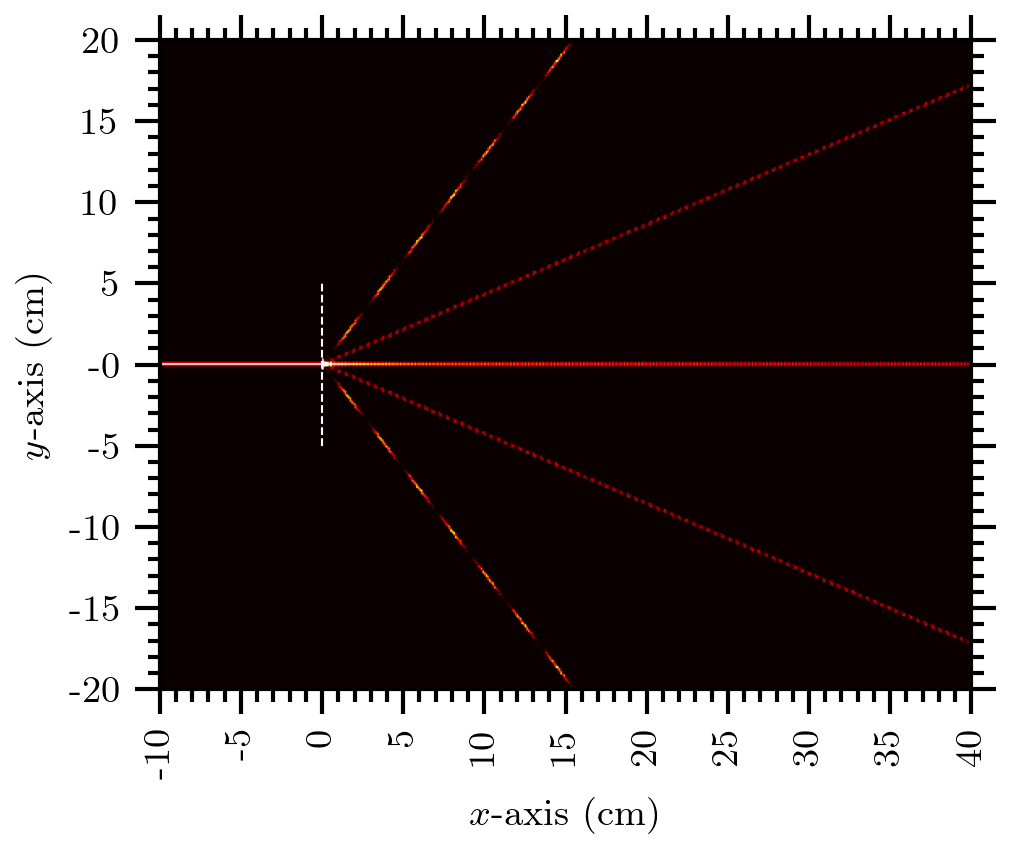

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

multiplier = 10
# Parameters
lambda_val = 633e-9  # Wavelength
xlim = (-0.1, 0.4)
ylim = (-0.20, 0.20)
dx = 0.001
dy = 0.001
x = np.arange(xlim[0],xlim[1]+dx, dx)
y = np.arange(ylim[0],ylim[1]+dy, dy)

# Create source positions
num_sources = int(625 * 2.5) ## around 2.5 mm beam
spacing = 1600e-9  # 1600 nm in meters
total_width = (num_sources-1) * spacing
print(total_width)
source_y_positions = np.linspace(-total_width/2, total_width/2, num_sources)
source_positions = [(0, y) for y in source_y_positions]

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Initialize total wave field
S_total = np.zeros_like(xv)

# Add contribution from each source
for source_x, source_y in source_positions:
    r = np.sqrt((xv - source_x)**2 + (yv - source_y)**2)
    # Add wave contribution from this source with amplitude decay
    S_total += np.cos(2 * np.pi * r / lambda_val) / np.sqrt(r)  

# Calculate intensity (square of amplitude)
S = S_total**2
S /= np.max(S)  # Normalize
#S = np.sqrt(S)  # scaling 
S[xv<0] = 0

# Gaussian beam profile at y=0
beam = np.exp(-(yv**2) / (2 * (total_width/4)**2))  # Gaussian in y-direction
# Apply 1/sqrt(x) decay only where x > 0
# Create a decay factor array that is 1 where x <= 0 and 1/sqrt(x) where x > 0
decay_factor = np.ones_like(xv)
decay_factor[xv > 0] = 0.1 / np.sqrt(xv[xv > 0])
# # Apply the decay to the entire beam
beam = beam * decay_factor
# # Normalize the beam
#beam /= np.max(beam)

S = S + beam
S[S>1] = 1

# Plot


plt.figure(figsize=(6, 3), dpi =300)
plt.imshow(S, extent=[*xlim,*ylim], cmap='hot', origin='lower')
plt.plot([0,0],[-0.05,0.05], color = 'white', linestyle = '--', linewidth = 0.5)
plt.grid(False)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.xticks(np.arange(xlim[0], xlim[1]+0.05, 0.05), 
           labels=[f"{x*100:.0f}" for x in np.arange(xlim[0], xlim[1]+0.05, 0.05)], 
           rotation=90)
plt.yticks(np.arange(ylim[0], ylim[1]+0.05, 0.05),
           labels=[f"{y*100:.0f}" for y in np.arange(ylim[0], ylim[1]+0.05, 0.05)])
plt.xlabel('$x$-axis (cm)')
plt.ylabel('$y$-axis (cm)')
plt.tick_params(axis='both', which='both', direction='out')
plt.tick_params(axis='both', which='both', direction='out')
plt.tight_layout()
plt.show()

0.1


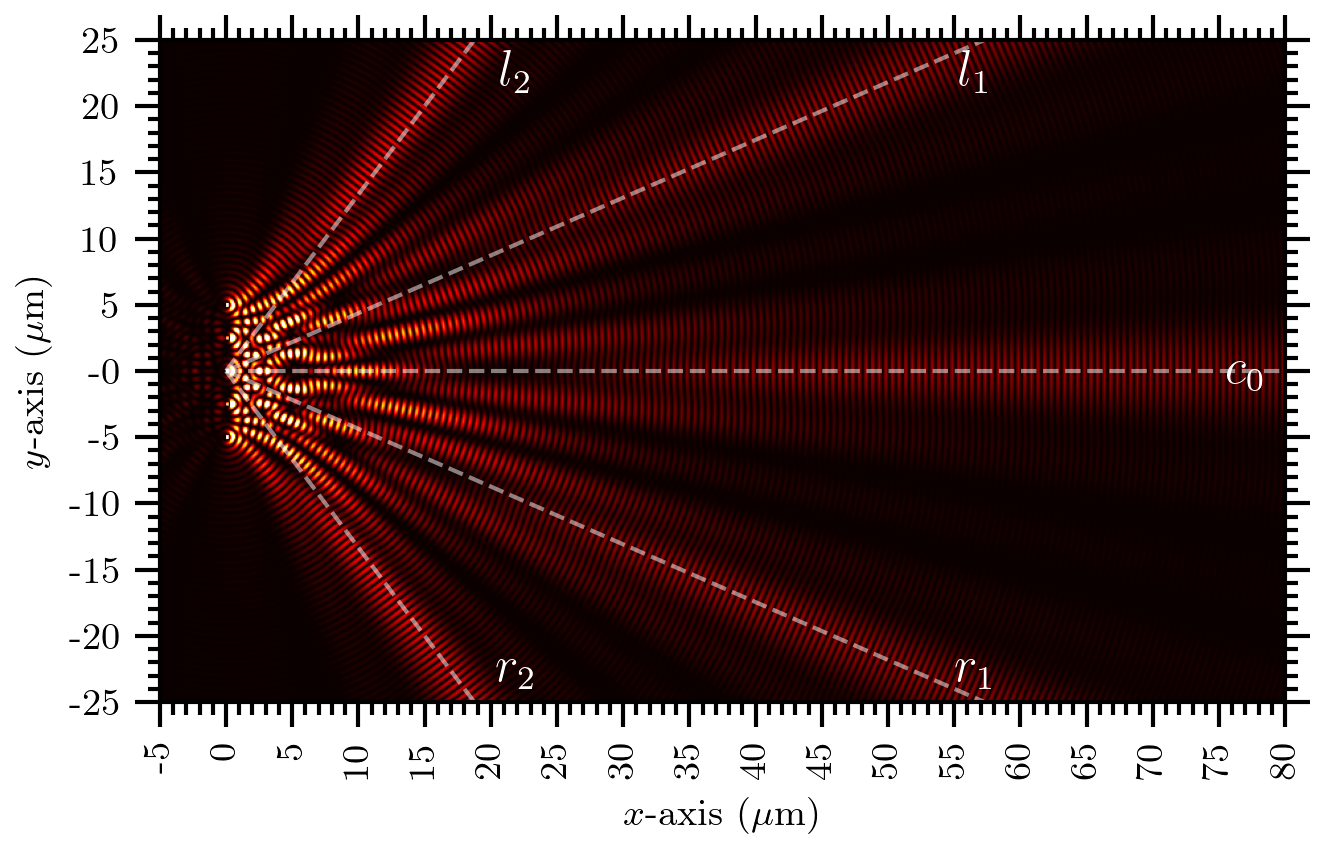

In [60]:
import numpy as np
import matplotlib.pyplot as plt

multiplier = 10
# Parameters
lambda_val = 0.01  # Wavelength
xlim = (-0.05, 0.8)
ylim = (-0.25, 0.25)
dx = 0.001
dy = 0.001
x = np.arange(xlim[0],xlim[1]+dx, dx)
y = np.arange(ylim[0],ylim[1]+dy, dy)

# Create source positions
num_sources = 5 ## around 5 mm beam
spacing = 0.025  # 1600 nm in meters
total_width = (num_sources-1) * spacing
print(total_width)
source_y_positions = np.linspace(-total_width/2, total_width/2, num_sources)
source_positions = [(0, y) for y in source_y_positions]

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Initialize total wave field
S_total = np.zeros_like(xv)
eps=1e-12

# Calculate Gaussian directivity parameters
# We want: peak at theta=0, half at theta=pi/2, near zero at theta=pi
sigma_sq = (np.pi/2)**2 / (2 * np.log(2))

# Add contribution from each source with individual directivity
for source_x, source_y in source_positions:
    # Calculate vector from this source to each point
    dx = xv - source_x
    dy = yv - source_y
    
    # Calculate distance
    r = np.sqrt(dx**2 + dy**2 + eps)
    
    # Calculate angle relative to THIS source's positive x-direction
    theta = np.arctan2(dy, dx)  # Angle from this specific source
    
    # Create directivity pattern for THIS source
    directivity = np.exp(-theta**2 / (2 * sigma_sq))
    
    # Add wave contribution from this source with its own directivity
    S_total += np.cos(2 * np.pi * r / lambda_val) / np.sqrt(r) * directivity

# Calculate intensity (square of amplitude)
S = S_total**2
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)
# Normalize properly
S = S / np.max(S)

m = [-2,-1,0,1,2]


plt.figure(figsize=(6, 3), dpi =300)
plt.imshow(S, extent=[*xlim,*ylim], cmap='hot', origin='lower')

for m_i in m:
    theta = np.arcsin(m_i * lambda_val / spacing)
    # Calculate where the line intersects the y-boundaries
    if np.tan(theta) != 0:
        # Calculate x where y = ylim[0] and y = ylim[1]
        x_at_ymin = ylim[0] / np.tan(theta)
        x_at_ymax = ylim[1] / np.tan(theta)
        
        # Use the x that's within xlim and closest to xlim[1]
        end_x = min(xlim[1], max(x_at_ymin, x_at_ymax))
        end_y = end_x * np.tan(theta)
    else:
        # For theta = 0 (central maximum)
        end_x = xlim[1]
        end_y = 0  
    # Calculate annotation position (90% of the line length)
    annot_x = 0.9 * end_x + 0.05
    annot_y = 0.9 * end_y

    # Plot the line
    plt.plot([0, end_x], [0, end_y], color='white', alpha=0.5, linewidth=1, linestyle='--')
    # Add annotation with the appropriate label
    label = ['$r_2$', '$r_1$', '$c_0$', '$l_1$', '$l_2$'][m_i + 2]
    plt.text(annot_x, annot_y, label, color='white', ha='center', va='center', fontsize=12)
    
plt.grid(False)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.xticks(np.arange(xlim[0], xlim[1]+0.05, 0.05), 
           labels=[f"{x*100:.0f}" for x in np.arange(xlim[0], xlim[1]+0.05, 0.05)], 
           rotation=90)

plt.yticks(np.arange(ylim[0], ylim[1]+0.05, 0.05),
           labels=[f"{y*100:.0f}" for y in np.arange(ylim[0], ylim[1]+0.05, 0.05)])
plt.xlabel(r'$x$-axis ($\mu$m)')
plt.ylabel(r'$y$-axis ($\mu$m)')
plt.tick_params(axis='both', which='both', direction='out')
plt.tight_layout()
plt.show()

0.1


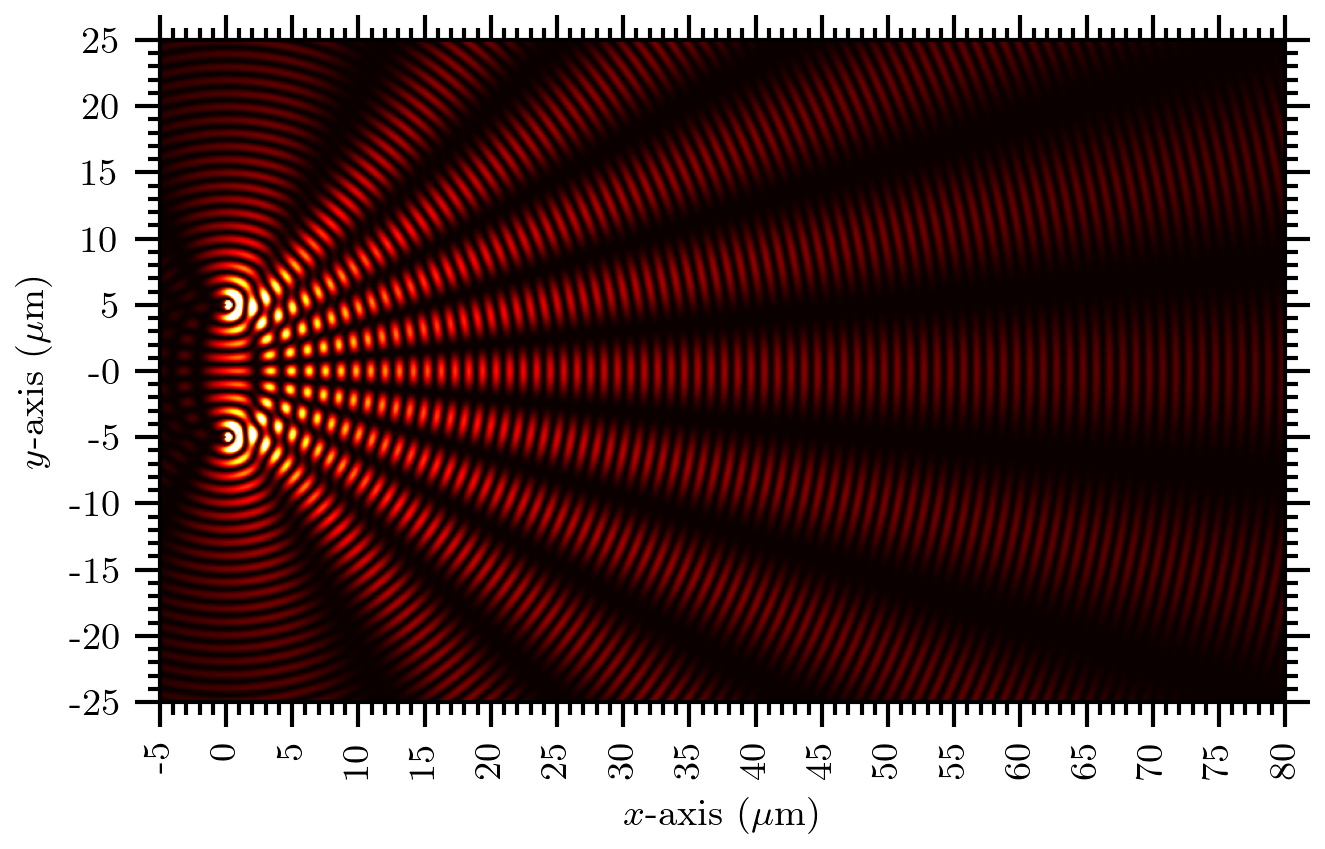

In [70]:
import numpy as np
import matplotlib.pyplot as plt

multiplier = 10
# Parameters
lambda_val = 0.02  # Wavelength
xlim = (-0.05, 0.8)
ylim = (-0.25, 0.25)
dx = 0.001
dy = 0.001
x = np.arange(xlim[0],xlim[1]+dx, dx)
y = np.arange(ylim[0],ylim[1]+dy, dy)

# Create source positions
num_sources = 2 ## around 5 mm beam
spacing = 0.1  # 1600 nm in meters
total_width = (num_sources-1) * spacing
print(total_width)
source_y_positions = np.linspace(-total_width/2, total_width/2, num_sources)
source_positions = [(0, y) for y in source_y_positions]

# Create meshgrid
xv, yv = np.meshgrid(x, y)

# Initialize total wave field
S_total = np.zeros_like(xv)
eps=1e-12

# Calculate Gaussian directivity parameters
# We want: peak at theta=0, half at theta=pi/2, near zero at theta=pi
sigma_sq = (np.pi/2)**2 / (2 * np.log(2))

# Add contribution from each source with individual directivity
for source_x, source_y in source_positions:
    # Calculate vector from this source to each point
    dx = xv - source_x
    dy = yv - source_y
    
    # Calculate distance
    r = np.sqrt(dx**2 + dy**2 + eps)
    
    # Calculate angle relative to THIS source's positive x-direction
    theta = np.arctan2(dy, dx)  # Angle from this specific source
    
    # Create directivity pattern for THIS source
    directivity = np.exp(-theta**2 / (2 * sigma_sq))
    
    # Add wave contribution from this source with its own directivity
    S_total += np.cos(2 * np.pi * r / lambda_val) / np.sqrt(r) * directivity

# Calculate intensity (square of amplitude)
S = S_total**2
s_max = np.percentile(S, 99.9)  # Clip only extreme outliers
S = np.clip(S, 0, s_max)
# Normalize properly
S = S / np.max(S)

m = [-2,-1,0,1,2]


plt.figure(figsize=(6, 3), dpi =300)
plt.imshow(S, extent=[*xlim,*ylim], cmap='hot', origin='lower')

# for m_i in m:
#     theta = np.arcsin(m_i * lambda_val / spacing)
#     # Calculate where the line intersects the y-boundaries
#     if np.tan(theta) != 0:
#         # Calculate x where y = ylim[0] and y = ylim[1]
#         x_at_ymin = ylim[0] / np.tan(theta)
#         x_at_ymax = ylim[1] / np.tan(theta)
        
#         # Use the x that's within xlim and closest to xlim[1]
#         end_x = min(xlim[1], max(x_at_ymin, x_at_ymax))
#         end_y = end_x * np.tan(theta)
#     else:
#         # For theta = 0 (central maximum)
#         end_x = xlim[1]
#         end_y = 0  
#     # Calculate annotation position (90% of the line length)
#     annot_x = 0.9 * end_x + 0.05
#     annot_y = 0.9 * end_y

#     # Plot the line
#     plt.plot([0, end_x], [0, end_y], color='white', alpha=0.5, linewidth=1, linestyle='--')
#     # Add annotation with the appropriate label
#     label = ['$r_2$', '$r_1$', '$c_0$', '$l_1$', '$l_2$'][m_i + 2]
#     plt.text(annot_x, annot_y, label, color='white', ha='center', va='center', fontsize=12)
    
plt.grid(False)
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.xticks(np.arange(xlim[0], xlim[1]+0.05, 0.05), 
           labels=[f"{x*100:.0f}" for x in np.arange(xlim[0], xlim[1]+0.05, 0.05)], 
           rotation=90)

plt.yticks(np.arange(ylim[0], ylim[1]+0.05, 0.05),
           labels=[f"{y*100:.0f}" for y in np.arange(ylim[0], ylim[1]+0.05, 0.05)])
plt.xlabel(r'$x$-axis ($\mu$m)')
plt.ylabel(r'$y$-axis ($\mu$m)')
plt.tick_params(axis='both', which='both', direction='out')
plt.tight_layout()
plt.show()